In [1]:
from hossam import load_data
from pandas import DataFrame

In [2]:
origin = load_data("body_size")
origin.head()

[data] https://data.hossam.kr/data/lab05/body_size.xlsx
[desc] 어느 학급 학생들의 이름, 성별, 키, 몸무게에 대한 가상의 데이터(메타데이터 없음)

field    description
-------  -------------
name     이름
sex      성별
height   키
weight   몸무게



,sex,height,weight
name,,,
Lee,M,175,98.0
Park,F,167,48.0
Hong,M,180,NaN
Kim,F,162,55.0
Nam,M,172,85.0


In [3]:
st1 = origin.stack()
print(type(st1))
st1

<class 'pandas.core.series.Series'>


name        
Lee   sex          M
      height     175
      weight    98.0
Park  sex          F
      height     167
      weight    48.0
Hong  sex          M
      height     180
Kim   sex          F
      height     162
      weight    55.0
Nam   sex          M
      height     172
      weight    85.0
dtype: object

In [4]:
df1 = DataFrame(origin.stack())
df1

0
name             
Lee  sex        M
     height   175
     weight  98.0
Park sex        F
     height   167
     weight  48.0
Hong sex        M
     height   180
Kim  sex        F
     height   162
     weight  55.0
Nam  sex        M
     height   172
     weight  85.0

In [5]:
st2 = origin.stack(dropna=False)
df2 = DataFrame(st2)
df2

C:\Users\itwill\AppData\Local\Temp\ipykernel_8564\1041415737.py:1: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  st2 = origin.stack(dropna=False)


0
name             
Lee  sex        M
     height   175
     weight  98.0
Park sex        F
     height   167
     weight  48.0
Hong sex        M
     height   180
     weight   NaN
Kim  sex        F
     height   162
     weight  55.0
Nam  sex        M
     height   172
     weight  85.0

In [6]:
st2.unstack()

,sex,height,weight
name,,,
Lee,M,175,98.0
Park,F,167,48.0
Hong,M,180,NaN
Kim,F,162,55.0
Nam,M,172,85.0


연습문제 - 게임 토너먼트 최고 득점자를 찾아라!

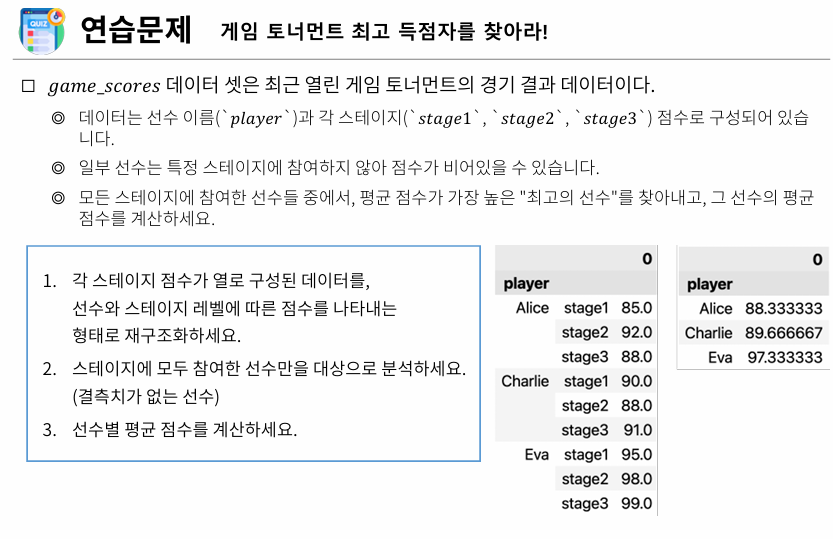

In [36]:
origin = load_data("game_scores")
origin.head()

[data] https://data.hossam.kr/data/lab05/game_scores.xlsx
[desc] 최근 열린 게임 토너먼트 경기 결과 데이터 (인덱스와 메타데이터 없음)
[!] Cannot read metadata


,player,stage1,stage2,stage3
0,Alice,85,92.0,88.0
1,Bob,78,NaN,95.0
2,Charlie,90,88.0,91.0
3,David,82,85.0,NaN
4,Eva,95,98.0,99.0


In [37]:
#각 스테이지 점수가 열로 구성된 데이터를, 선수와 스테이지 레벨에 따른 점수를 나타내는 형태로 재구조화
df = origin.dropna()
df2 = df.set_index('player')
df3 = DataFrame(df2.stack())
df3


0
player              
Alice   stage1  85.0
        stage2  92.0
        stage3  88.0
Charlie stage1  90.0
        stage2  88.0
        stage3  91.0
Eva     stage1  95.0
        stage2  98.0
        stage3  99.0

In [38]:
df4 = df3.reset_index()
df4.filter(['player',0]).groupby('player').mean()

,0
player,
Alice,88.333333
Charlie,89.666667
Eva,97.333333
